In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings #to remove warning message
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data["bmi"].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [5]:
data["bmi"].fillna(data["bmi"].mean(),inplace=True)


In [6]:
data["bmi"]

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [7]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data[["stroke","gender",]].value_counts()

stroke  gender
0       Female    2853
        Male      2007
1       Female     141
        Male       108
0       Other        1
Name: count, dtype: int64

In [9]:
print(data["gender"].unique())
print(data["smoking_status"].unique())

['Male' 'Female' 'Other']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
data[["heart_disease","smoking_status"]].value_counts()

heart_disease  smoking_status 
0              never smoked       1802
               Unknown            1496
               formerly smoked     808
               smokes              728
1              never smoked         90
               formerly smoked      77
               smokes               61
               Unknown              48
Name: count, dtype: int64

In [11]:
data[["heart_disease","age"]].value_counts()

heart_disease  age 
0              57.0    88
               54.0    84
               45.0    84
               51.0    83
               52.0    83
                       ..
1              42.0     1
               47.0     1
               34.0     1
               28.0     1
               2.0      1
Name: count, Length: 148, dtype: int64

In [12]:
print(data["work_type"].unique())
data[['heart_disease','work_type']].value_counts()

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


heart_disease  work_type    
0              Private          2767
               Self-employed     738
               children          686
               Govt_job          621
1              Private           158
               Self-employed      81
               Govt_job           36
0              Never_worked       22
1              children            1
Name: count, dtype: int64

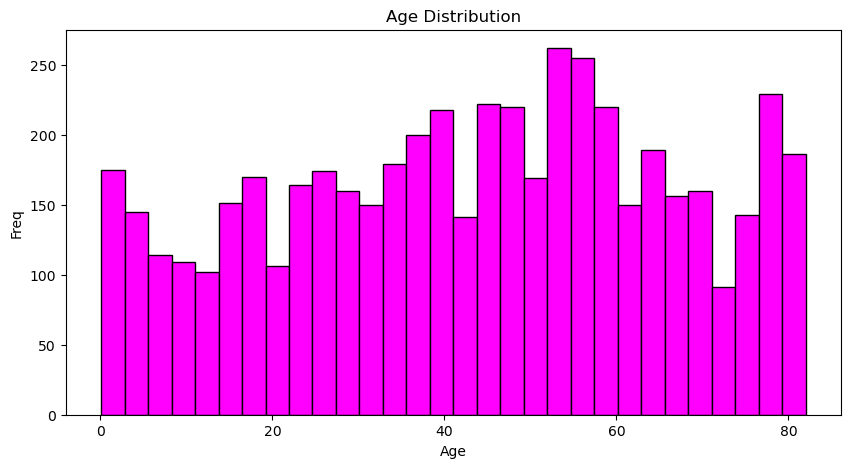

In [13]:
plt.figure(figsize=(10,5))
plt.hist(data['age'], bins=30, color='Magenta',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

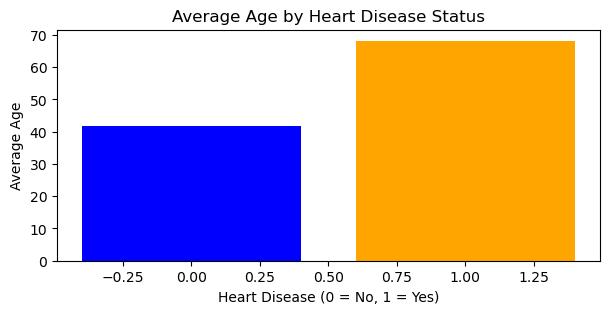

In [14]:
# Correcting and generating the bar chart
import matplotlib.pyplot as plt

# Calculate the average age for each heart disease category
average_age_by_heart_disease = data.groupby('heart_disease')['age'].mean()

# Create the bar plot
plt.figure(figsize=(7, 3))
plt.bar(average_age_by_heart_disease.index, average_age_by_heart_disease, color=['blue', 'orange'])
plt.title("Average Age by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Average Age")
plt.show()


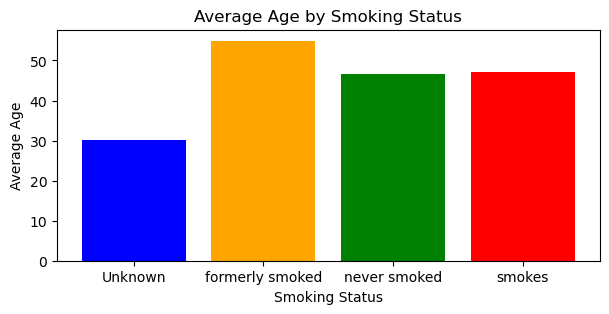

In [15]:
import matplotlib.pyplot as plt

# Calculate the average age for each smoking status category
average_age_by_smoking_status = data.groupby('smoking_status')['age'].mean()

# Create the bar plot
plt.figure(figsize=(7, 3))
plt.bar(average_age_by_smoking_status.index, average_age_by_smoking_status, color=['blue', 'orange', 'green', 'red'])
plt.title("Average Age by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Average Age")
plt.show()


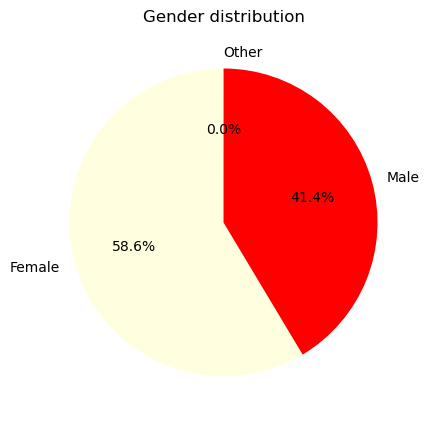

In [16]:
plt.figure(figsize=(10,5))

gender_counts = data['gender'].value_counts()
#in this vlues should be first and while defining the label label keyword should must
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%',startangle= 90, colors=['lightyellow','r','g'])
plt.title("Gender distribution")

plt.show()

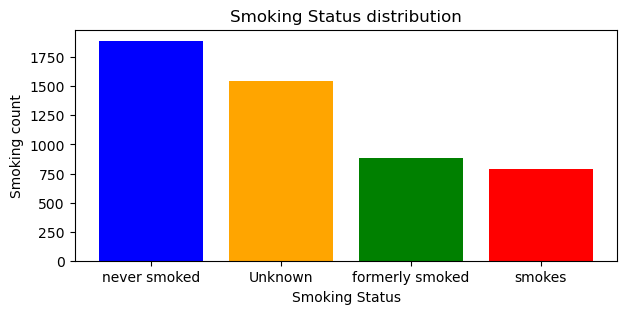

In [17]:
import matplotlib.pyplot as plt

# Calculate the average age for each smoking status category
Smoking_count= data['smoking_status'].value_counts()

# Create the bar plot
plt.figure(figsize=(7, 3))
plt.bar(Smoking_count.index, Smoking_count, color=['blue', 'orange', 'green', 'red'])
plt.title("Smoking Status distribution")
plt.xlabel("Smoking Status")
plt.ylabel("Smoking count")
plt.show()

In [18]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [19]:
data.tail(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [20]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
# ( forward fill )data.fillna(method ="ffill")
#( backword) data.fillno(method="bfill")

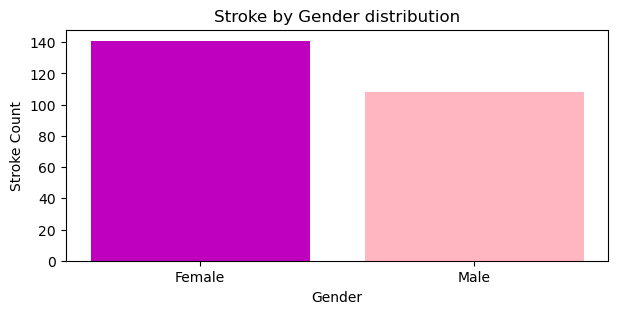

In [23]:
gender_stroke=data[data["stroke"]==1]["gender"].value_counts()
plt.figure(figsize=(7, 3))
plt.bar(gender_stroke.index, gender_stroke, color=['m', 'lightpink'])
plt.title("Stroke by Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Stroke Count")
plt.show()
                   

In [24]:
data.to_csv("Heath",index=False)

In [25]:
import os
print(os.getcwd())

C:\Users\lenovo


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Text(0, 0.5, 'hypertension')

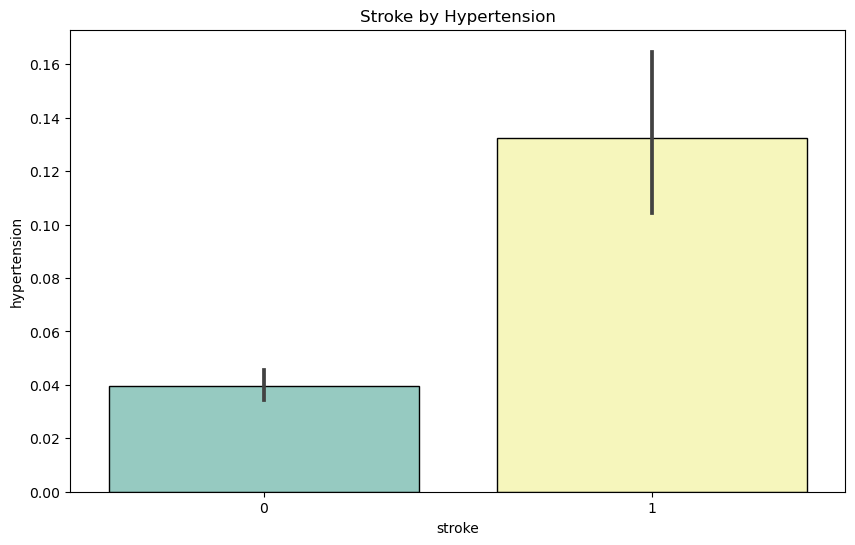

In [27]:
# Create a box plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='hypertension', y='stroke', data=data, palette="Set3",edgecolor='black')

# Add title and labels
plt.title('Stroke by Hypertension')
plt.xlabel('stroke')
plt.ylabel('hypertension')

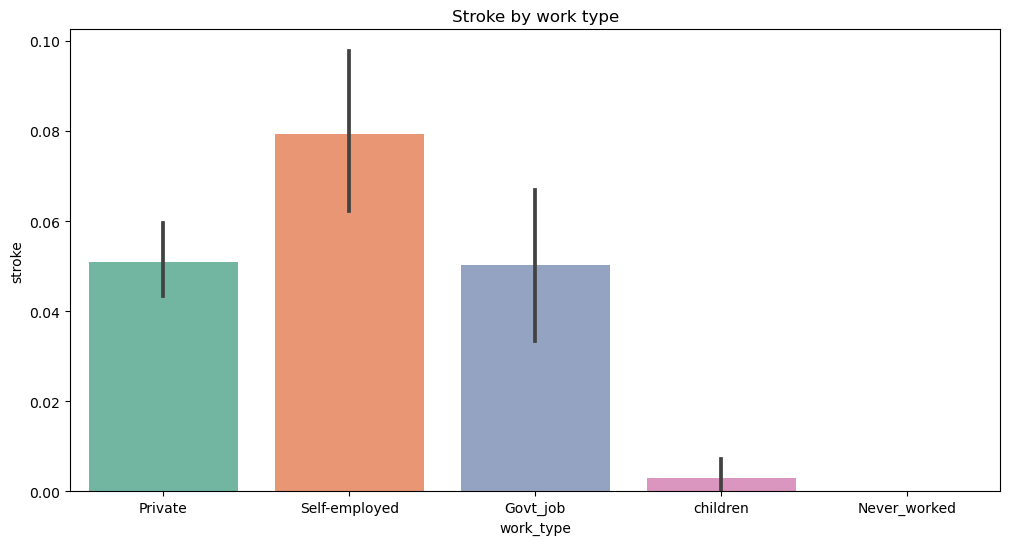

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='work_type', y='stroke', data=data, palette="Set2")
plt.title('Stroke by work type')
plt.show()

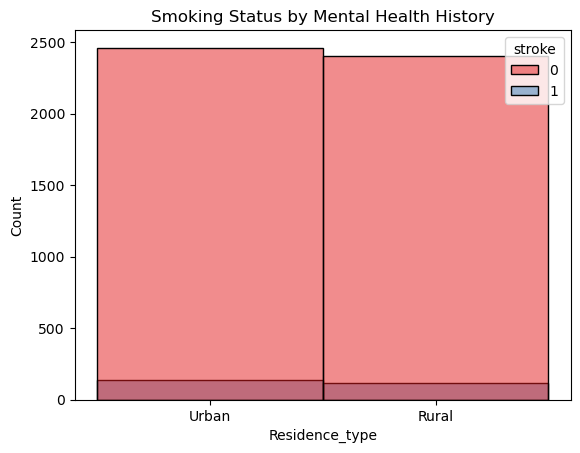

In [29]:
sns.histplot(x='Residence_type', hue='stroke', data=data, palette="Set1",edgecolor="black")
plt.title('Smoking Status by Mental Health History')
plt.show()

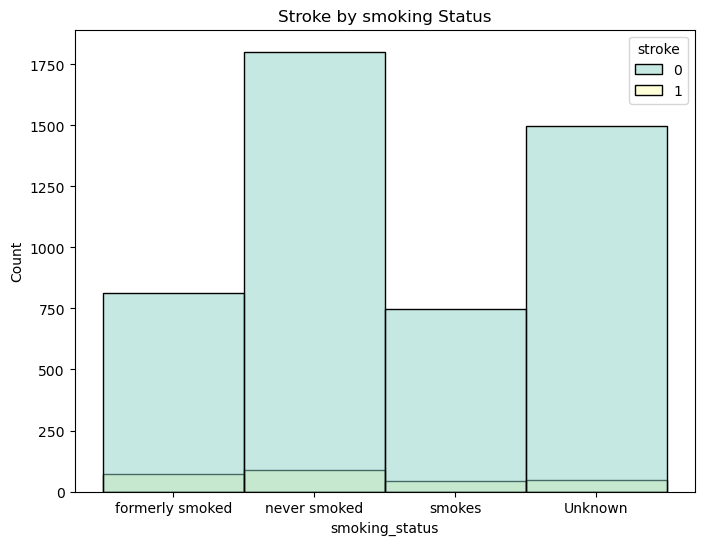

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(x='smoking_status', hue='stroke', data=data, palette="Set3",edgecolor="black")
plt.title('Stroke by smoking Status')
plt.show()

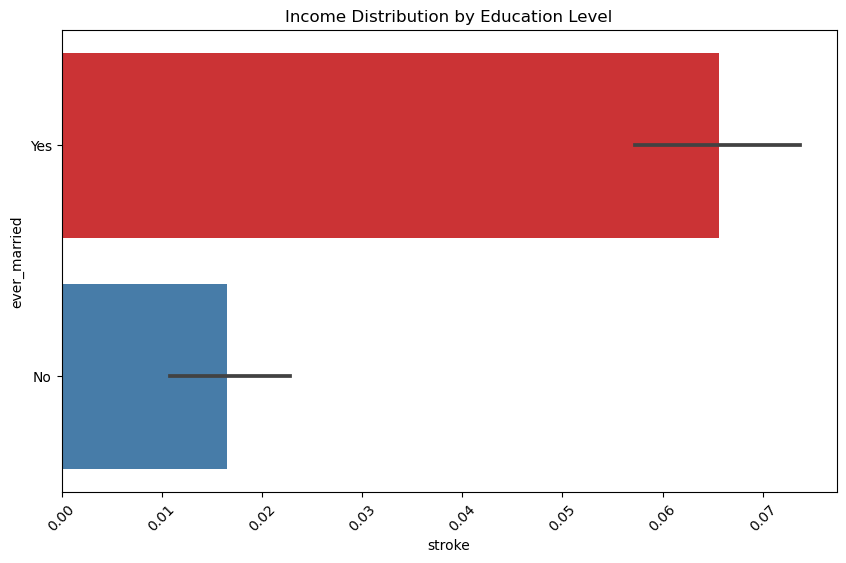

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='stroke', y='ever_married', data=data, palette="Set1")
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

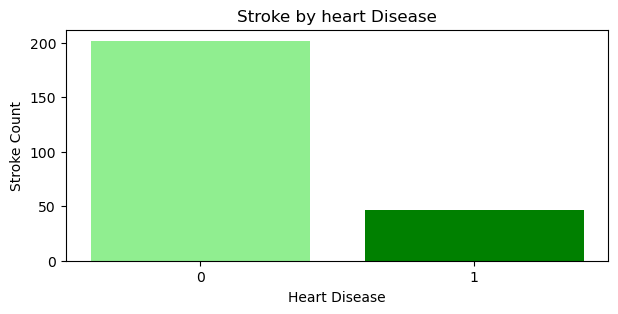

In [32]:
stroke=data[data["stroke"]==1]["heart_disease"].value_counts()
plt.figure(figsize=(7, 3))
plt.bar(stroke.index,stroke, color=['lightgreen', 'green'])
plt.title("Stroke by heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Stroke Count")
plt.xticks([0, 1,])
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
#fit and transform the data
data['gender_enc']=label.fit_transform(data['gender'])
data['ever_married_enc']=label.fit_transform(data['ever_married'])
data['work_type_enc']=label.fit_transform(data['work_type'])
data['Residence_type_enc']=label.fit_transform(data['Residence_type'])
data['smoking_status_enc']=label.fit_transform(data['smoking_status'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   gender              5110 non-null   object 
 2   age                 5110 non-null   float64
 3   hypertension        5110 non-null   int64  
 4   heart_disease       5110 non-null   int64  
 5   ever_married        5110 non-null   object 
 6   work_type           5110 non-null   object 
 7   Residence_type      5110 non-null   object 
 8   avg_glucose_level   5110 non-null   float64
 9   bmi                 5110 non-null   float64
 10  smoking_status      5110 non-null   object 
 11  stroke              5110 non-null   int64  
 12  gender_enc          5110 non-null   int32  
 13  ever_married_enc    5110 non-null   int32  
 14  work_type_enc       5110 non-null   int32  
 15  Residence_type_enc  5110 non-null   int32  
 16  smokin

In [36]:
# Define features and target variable
X = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','gender_enc',
        'ever_married_enc','work_type_enc','Residence_type_enc','smoking_status_enc']]

# Define multiple targets
y = data['stroke']

In [37]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_enc,ever_married_enc,work_type_enc,Residence_type_enc,smoking_status_enc
0,67.0,0,1,228.69,36.600000,1,1,2,1,1
1,61.0,0,0,202.21,28.893237,0,1,3,0,2
2,80.0,0,1,105.92,32.500000,1,1,2,0,2
3,49.0,0,0,171.23,34.400000,0,1,2,1,3
4,79.0,1,0,174.12,24.000000,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,2,1,2
5106,81.0,0,0,125.20,40.000000,0,1,3,1,2
5107,35.0,0,0,82.99,30.600000,0,1,3,0,2
5108,51.0,0,0,166.29,25.600000,1,1,2,0,1


In [38]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

#initialize SMOTE with sampling strategy (you can adjust it as needed)
smote = SMOTE(sampling_strategy='auto')

#apply SMOTE to resample the dataset
x_resampled, y_resampled = smote.fit_resample(X,y)
y_resampled.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25)

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

pred= clf.predict(x_test)

acc=accuracy_score(y_test,pred)
print(f"Accuracy for Stroke : {acc:2f}")

Accuracy for Stroke : 0.911559


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25)

#Random forest 
from sklearn.ensemble import RandomForestClassifier

str=RandomForestClassifier()
str.fit(x_train, y_train)

pred= str.predict(x_test)

acc=accuracy_score(y_test,pred)
print(f"Accuracy for stroke: {acc:2f}")
import pickle

with open('RandomForest_stroke.pkl', 'wb')as file:
    pickle.dump(str,file)

with open('RandomForest_stroke.pkl', 'rb')as file:
    load_str=pickle.load(file)

Accuracy for stroke: 0.934183


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25)

#SVM
from sklearn.svm import SVC
clf= SVC()
clf.fit(x_train, y_train)

pred= clf.predict(x_test)

acc=accuracy_score(y_test,pred)
print(f"Accuracy for Stroke : {acc:2f}")

Accuracy for Stroke : 0.767585


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf.fit(x_train, y_train)

pred= clf.predict(x_test)

acc=accuracy_score(y_test,pred)
print(f"Accuracy for Stroke : {acc:2f}")

Accuracy for Stroke : 0.788976


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25)

#logistic regression
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(x_train,y_train)

pred= clf.predict(x_test)

acc=accuracy_score(y_test,pred)
print(f"Accuracy for Stroke : {acc:2f}")

Accuracy for Stroke : 0.804196


In [48]:
!pip list >requirement_stroke.txt

In [49]:
!python --version

Python 3.11.7
